## **Comparison of Clustering Algorithms**

In [3]:
# run this cell if you're using Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
  import sys
  import os
  !git clone https://github.com/satishchandrareddy/UnsupervisedML.git
  code_location = "/content/UnsupervisedML/Code/Clustering"
  sys.path.append(os.path.abspath(code_location))

Cloning into 'UnsupervisedML'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 199 (delta 90), reused 168 (delta 59), pack-reused 0
Receiving objects: 100% (199/199), 20.17 MiB | 20.72 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [4]:
import create_data_cluster_sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import kmeans
import dbscan
import gaussianmm

## **Generate Datasets**

In [11]:
np.random.seed(31)
cases = ["noisy_circles", "noisy_moons", "blobs", "aniso", "varied_blobs1"]
nsample = 1500
scaler = StandardScaler()
X = {case : scaler.fit_transform(create_data_cluster_sklearn.create_data_cluster(nsample, case).T).T for case in cases}

Number of dimensions: 2 Number of Samples: 1500
Number of dimensions: 2 Number of Samples: 1500
Number of dimensions: 2 Number of Samples: 1500
Number of dimensions: 2 Number of Samples: 1500
Number of dimensions: 2 Number of Samples: 1500


## **Define the Models**

In [14]:
models = {
    'K-Means': [kmeans.kmeans(ncluster=2, initialization='kmeans++'),
               kmeans.kmeans(ncluster=3, initialization='kmeans++')],
    'DBSCAN': [dbscan.DBSCAN(epsilon=0.3, min_points=3, 
					        dist_func=lambda x1, x2: np.sqrt(np.dot(x1-x2,x1-x2))),
              dbscan.DBSCAN(epsilon=0.18, min_points=5, 
					        dist_func=lambda x1, x2: np.sqrt(np.dot(x1-x2,x1-x2))),
              dbscan.DBSCAN(epsilon=0.15, min_points=20, 
					        dist_func=lambda x1, x2: np.sqrt(np.dot(x1-x2,x1-x2)))],
    'GaussianMM': [gaussianmm.gaussianmm(ncluster=2, initialization='kmeans++'),
                   gaussianmm.gaussianmm(ncluster=3, initialization='kmeans++')]    
}

## **Train Models and Plot Resulting Clusters for Comparison**

Iteration: 0  Objective Function: 2598.5706238435296
Iteration: 1  Objective Function: 1968.3085535027892
Iteration: 2  Objective Function: 1921.7147297654028
Iteration: 3  Objective Function: 1909.899260808967
Iteration: 4  Objective Function: 1906.772775021498
Iteration: 5  Objective Function: 1906.211993489113
Iteration: 6  Objective Function: 1906.207759462187
Log Likelihood Function: -4839.268568022975
Log Likelihood Function: -4208.296973034532
Log Likelihood Function: -4204.6860931959545
Log Likelihood Function: -4203.256166533428
Log Likelihood Function: -4202.532319811698
Log Likelihood Function: -4202.146770064657
Log Likelihood Function: -4201.912341405108
Log Likelihood Function: -4201.741697830986
Log Likelihood Function: -4201.59811331572
Log Likelihood Function: -4201.467092315159
Log Likelihood Function: -4201.343082586009
Log Likelihood Function: -4201.223953017796
Log Likelihood Function: -4201.10884761536
Log Likelihood Function: -4200.997381837369
Log Likelihood Fun

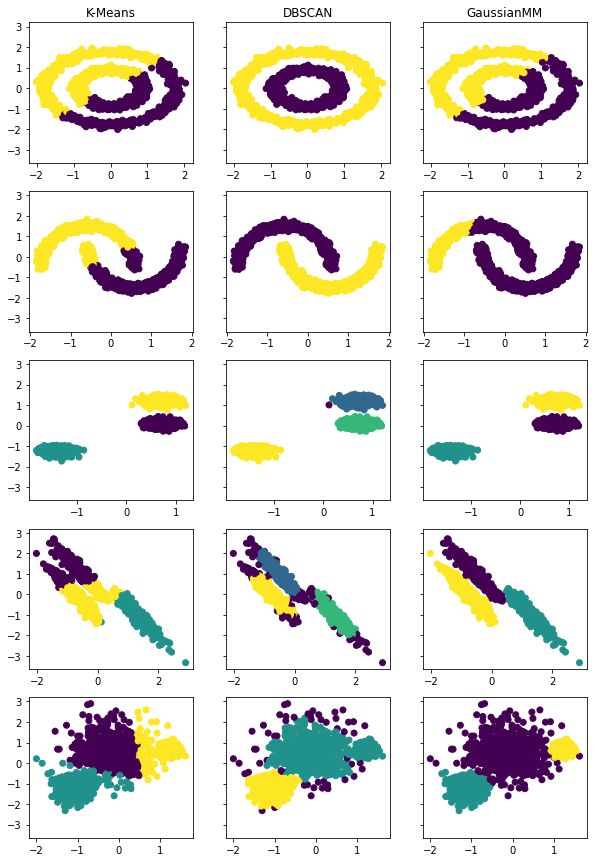

In [19]:
fig, axes = plt.subplots(len(X), len(models), figsize=(10,15), sharey=True)
for i,data in enumerate(X.items()):
  for j,model in enumerate(models.items()):
    np.random.seed(31)
    if i == 0:
      axes[i,j].set_title(model[0])
    if data[0] == 'noisy_circles' or data[0] == 'noisy_moons':
      mod = model[1][0]
    elif data[0] == 'aniso' and model[0] == 'DBSCAN':
      mod = model[1][2]
    else:
      mod = model[1][1]
    if model[0] == 'DBSCAN':
      mod.fit(data[1])
    else:
      niter = 100
      mod.fit(data[1], niter)
    labels = mod.labels_ if model[0] == 'DBSCAN' else mod.clustersave[-1]
    axes[i,j].scatter(data[1][0,:], data[1][1,:], c=labels)
    
plt.show()